In [1]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, accuracy_score

In [34]:
df = pd.read_excel('Bank_Balance_Dataset.xlsx')

In [96]:
df.tail()

,Month,Year,Bank Balance,Monthly Balance,TimeIndex
175,8,2024,232385,-4899,176
176,9,2024,227309,-5076,177
177,10,2024,222064,-5245,178
178,11,2024,216928,-5136,179
179,12,2024,212078,-4850,180


In [93]:
df['TimeIndex'] = (df['Year'] - df['Year'].min()) * 12 + df['Month']

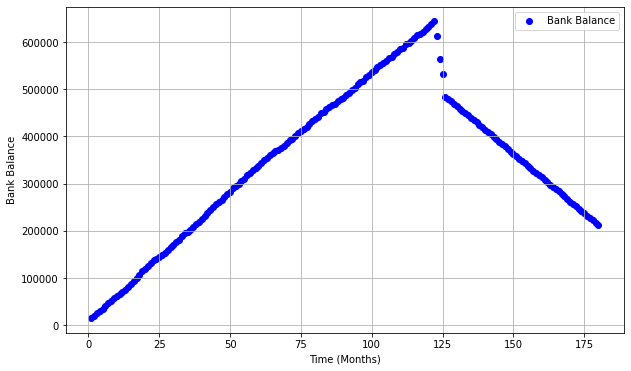

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(df['TimeIndex'], df['Bank Balance'], color='blue', label= 'Bank Balance')
plt.xlabel('Time (Months)')
plt.ylabel('Bank Balance')
plt.legend()
plt.grid(True)
plt.show()

We see that approximately last 60 months there is a visible tendency to lowering the balance. 

In [23]:
last60 = df.tail(60) #Last 60 months of data
last60

,Month,Year,Bank Balance,Monthly Balance,TimeIndex
120,1,2020,637468,5609,121
121,2,2020,643488,6020,122
122,3,2020,612740,-30748,123
123,4,2020,563650,-49090,124
124,5,2020,531587,-32063,125
125,6,2020,483412,-48175,126
126,7,2020,478635,-4777,127
127,8,2020,474108,-4527,128
128,9,2020,468797,-5311,129
129,10,2020,463494,-5303,130


We see that there is similar monthly balance was last 54 months, so we can try predict future based on that

In [24]:
last54 = df.tail(54) #last 54 months with similar tendency
last54.tail(12)

,Month,Year,Bank Balance,Monthly Balance,TimeIndex
168,1,2024,267619,-5351,169
169,2,2024,262190,-5429,170
170,3,2024,256883,-5307,171
171,4,2024,252293,-4590,172
172,5,2024,247113,-5180,173
173,6,2024,241893,-5220,174
174,7,2024,237284,-4609,175
175,8,2024,232385,-4899,176
176,9,2024,227309,-5076,177
177,10,2024,222064,-5245,178


In [49]:
X = last54[['TimeIndex']].values
y = last54['Bank Balance'].values

In [47]:
54*0.8

43.2

43 months is approx 80% of data, so we will train the regression on first 43 months

In [59]:
#X_train, X_test = X[0:42], X[42:-1]
#y_train, y_test = y[0:42], y[42:-1]

In [71]:
model = LinearRegression()

scoring_metrics = {
    "R2": make_scorer(r2_score),
    "RMSE": make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False))
}

linear_cv_results = {
    metric: cross_val_score(model, X, y, scoring=scorer, cv=5)
    for metric, scorer in scoring_metrics.items()
}

linear_cv_summary = {metric: (scores.mean(), scores.std()) for metric, scores in linear_cv_results.items()}
linear_cv_summary

{'R2': (0.9987345494807887, 0.00048033070833798885),
 'RMSE': (541.0495207318602, 102.48596450847799)}

### Linear Regression
R²: 0.99 (±0.0004) \
Explains 99% of the variance in bank balance. \
\
RMSE: 541.05 (±102.49)\
Not a big error comparing to the bank balance

In [72]:
model.fit(X, y)

LinearRegression()

In [76]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Regression Formula:\n Bank Balance = {slope.round(2)}×TimeIndex + {intercept.round(2)}")

Linear Regression Formula:
 Bank Balance = -5044.37×TimeIndex + 1120150.37


### Bank Balance = -5 044.37×TimeIndex + 1 120 150.37

In [87]:
zero_balance_time= ((0 - intercept) / slope)-180
years_to_zero = zero_balance_time / 12
print(zero_balance_time, years_to_zero)

42.05945388947896 3.5049544907899133


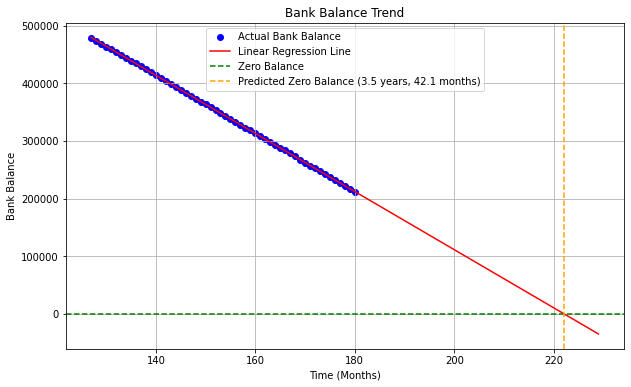

In [89]:
future = np.arange(X.min(), X.max() + 50, 1).reshape(-1, 1)
predict = model.predict(future)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Bank Balance')
plt.plot(future, predict, color='red', label='Linear Regression Line')
plt.axhline(0, color='green', linestyle='--', label='Zero Balance')
plt.axvline(zero_balance_time+180, color='orange', linestyle='--', label=f'Predicted Zero Balance ({years_to_zero:.1f} years, {zero_balance_time:.1f} months)')
plt.title('Bank Balance Trend')
plt.xlabel('Time (Months)')
plt.ylabel('Bank Balance')
plt.legend()
plt.grid(True)
plt.show()